<a href="https://colab.research.google.com/github/amirgarsha/ann_MK/blob/main/classification_challanges.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## import libraries

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

## Import Dataset

In [ ]:
fmnist_dataset = keras.datasets.fashion_mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = fmnist_dataset.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
print( X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [ ]:
X_train, X_test = X_train/255.0, X_test/255.0

## Define Model with different initialization

In [ ]:
## model with He initialization
initializer_he = keras.initializers.HeNormal()

model_he_init = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(50, activation="relu", kernel_initializer= initializer_he),
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
]

)

In [ ]:
model_he_init.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 50)                39250     
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
Total params: 42310 (165.27 KB)
Trainable params: 42310 (165.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
weight, bias = model_he_init.layers[1].get_weights()
print(weight)
print(bias)

[[-0.01615884  0.03787501  0.02938883 ... -0.05254702 -0.04057484
   0.00495733]
 [ 0.06681054 -0.00155599 -0.07423579 ... -0.04049765 -0.01265809
  -0.01257188]
 [ 0.05056994 -0.0110037  -0.0707923  ... -0.11371574 -0.05882423
  -0.11279096]
 ...
 [ 0.03732279 -0.00853963  0.01334038 ... -0.01690961 -0.00185726
   0.03182492]
 [-0.00824714 -0.04479632 -0.04008211 ...  0.08661735  0.01977062
   0.01993682]
 [ 0.06905155  0.03796542  0.02250274 ... -0.02305327  0.02880623
   0.00612667]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


In [ ]:
model_he_init.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
##fit model
history_he_init = model_he_init.fit(X_train, y_train, epochs=50, validation_split=0.15)

Epoch 1/50
1594/1594 [==============================] - 6s 3ms/step - loss: 0.8638 - accuracy: 0.7124 - val_loss: 0.5859 - val_accuracy: 0.7942
Epoch 2/50
1594/1594 [==============================] - 4s 3ms/step - loss: 0.5371 - accuracy: 0.8141 - val_loss: 0.4983 - val_accuracy: 0.8250
Epoch 3/50
1594/1594 [==============================] - 3s 2ms/step - loss: 0.4836 - accuracy: 0.8311 - val_loss: 0.5134 - val_accuracy: 0.8161
Epoch 4/50
1594/1594 [==============================] - 3s 2ms/step - loss: 0.4540 - accuracy: 0.8417 - val_loss: 0.4477 - val_accuracy: 0.8424
Epoch 5/50
1594/1594 [==============================] - 4s 3ms/step - loss: 0.4315 - accuracy: 0.8491 - val_loss: 0.4683 - val_accuracy: 0.8303
Epoch 6/50
1594/1594 [==============================] - 3s 2ms/step - loss: 0.4165 - accuracy: 0.8537 - val_loss: 0.4289 - val_accuracy: 0.8468
Epoch 7/50
1594/1594 [==============================] - 3s 2ms/step - loss: 0.4016 - accuracy: 0.8599 - val_loss: 0.4074 - val_accuracy:

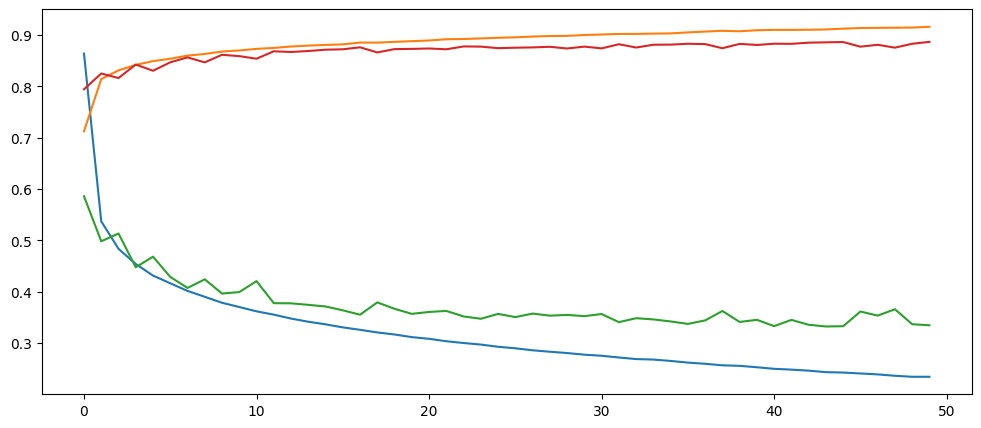

In [ ]:
##plot
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(history_he_init.history["loss"] , label="train loss")
ax.plot(history_he_init.history["accuracy"], label="train accuracy")
ax.plot(history_he_init.history["val_loss"], label="validation loss")
ax.plot(history_he_init.history["val_accuracy"], label="validation accuracy")

In [ ]:
## model with Lecunn initialization
initializer_lecun = keras.initializers.LecunNormal()

model_lecun_init = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(50, activation="selu", kernel_initializer= initializer_lecun),
    keras.layers.Dense(50, activation="selu"),
    keras.layers.Dense(10, activation="softmax")
]

)

In [ ]:
model_lecun_init.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 50)                39250     
                                                                 
 dense_4 (Dense)             (None, 50)                2550      
                                                                 
 dense_5 (Dense)             (None, 10)                510       
                                                                 
Total params: 42310 (165.27 KB)
Trainable params: 42310 (165.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
weight_lecun, bias_lecun = model_lecun_init.layers[1].get_weights()
print(weight_lecun)
print(bias_lecun)

[[ 0.03253734  0.01455651 -0.03422309 ... -0.04298353 -0.00774314
  -0.02234769]
 [-0.04811908 -0.05928034 -0.00721819 ...  0.00394125  0.00525736
   0.00063594]
 [-0.02072624  0.06217627  0.0384501  ...  0.00232318 -0.03055597
   0.01451236]
 ...
 [-0.02924255 -0.0425963  -0.04018951 ...  0.04416874 -0.03987719
   0.07311782]
 [-0.01811801  0.03598249  0.04824139 ... -0.01648858  0.0272912
   0.06558967]
 [-0.0200616  -0.02432109 -0.02858416 ... -0.01290261 -0.00054885
   0.01334733]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


In [ ]:
model_lecun_init.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
##fit model
history_lecun = model_lecun_init.fit(X_train, y_train, epochs=50, validation_split=0.15)

Epoch 1/50
1594/1594 [==============================] - 5s 3ms/step - loss: 0.6304 - accuracy: 0.7845 - val_loss: 0.4928 - val_accuracy: 0.8217
Epoch 2/50
1594/1594 [==============================] - 4s 2ms/step - loss: 0.4656 - accuracy: 0.8354 - val_loss: 0.4480 - val_accuracy: 0.8373
Epoch 3/50
1594/1594 [==============================] - 4s 2ms/step - loss: 0.4348 - accuracy: 0.8458 - val_loss: 0.4363 - val_accuracy: 0.8443
Epoch 4/50
1594/1594 [==============================] - 4s 2ms/step - loss: 0.4158 - accuracy: 0.8517 - val_loss: 0.4184 - val_accuracy: 0.8530
Epoch 5/50
1594/1594 [==============================] - 4s 3ms/step - loss: 0.4004 - accuracy: 0.8582 - val_loss: 0.4075 - val_accuracy: 0.8536
Epoch 6/50
1594/1594 [==============================] - 3s 2ms/step - loss: 0.3891 - accuracy: 0.8612 - val_loss: 0.4083 - val_accuracy: 0.8496
Epoch 7/50
1594/1594 [==============================] - 4s 2ms/step - loss: 0.3789 - accuracy: 0.8648 - val_loss: 0.3864 - val_accuracy:

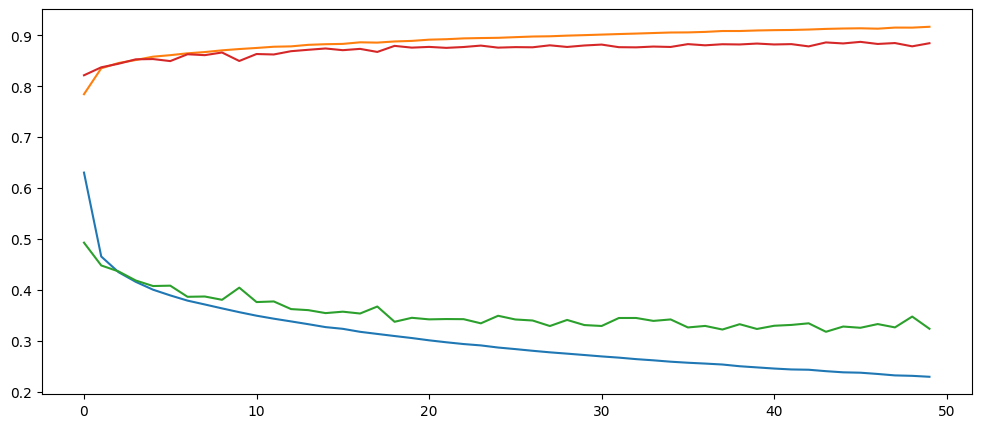

In [ ]:
##plot
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(history_lecun.history["loss"] , label="train loss")
ax.plot(history_lecun.history["accuracy"], label="train accuracy")
ax.plot(history_lecun.history["val_loss"], label="validation loss")
ax.plot(history_lecun.history["val_accuracy"], label="validation accuracy")

## Model with Batch Normalization

In [ ]:
## model with Batch Normalization
initializer_he = keras.initializers.HeNormal()

model_BNorm = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(50, activation="relu", kernel_initializer= initializer_he),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(50, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
]

)

In [ ]:
model_BNorm.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 50)                39250     
                                                                 
 batch_normalization (Batch  (None, 50)                200       
 Normalization)                                                  
                                                                 
 dense_7 (Dense)             (None, 50)                2550      
                                                                 
 batch_normalization_1 (Bat  (None, 50)                200       
 chNormalization)                                                
                                                                 
 dense_8 (Dense)             (None, 10)               

In [ ]:
model_BNorm.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
##fit model
history_BNorm = model_BNorm.fit(X_train, y_train, epochs=50, validation_split=0.15)

Epoch 1/50
1594/1594 [==============================] - 6s 3ms/step - loss: 0.6212 - accuracy: 0.7876 - val_loss: 0.4681 - val_accuracy: 0.8346
Epoch 2/50
1594/1594 [==============================] - 4s 2ms/step - loss: 0.4594 - accuracy: 0.8371 - val_loss: 0.4043 - val_accuracy: 0.8567
Epoch 3/50
1594/1594 [==============================] - 4s 3ms/step - loss: 0.4148 - accuracy: 0.8537 - val_loss: 0.3973 - val_accuracy: 0.8591
Epoch 4/50
1594/1594 [==============================] - 5s 3ms/step - loss: 0.3905 - accuracy: 0.8616 - val_loss: 0.4418 - val_accuracy: 0.8358
Epoch 5/50
1594/1594 [==============================] - 4s 3ms/step - loss: 0.3726 - accuracy: 0.8661 - val_loss: 0.3688 - val_accuracy: 0.8663
Epoch 6/50
1594/1594 [==============================] - 4s 2ms/step - loss: 0.3588 - accuracy: 0.8716 - val_loss: 0.3736 - val_accuracy: 0.8643
Epoch 7/50
1594/1594 [==============================] - 4s 3ms/step - loss: 0.3462 - accuracy: 0.8765 - val_loss: 0.3837 - val_accuracy:

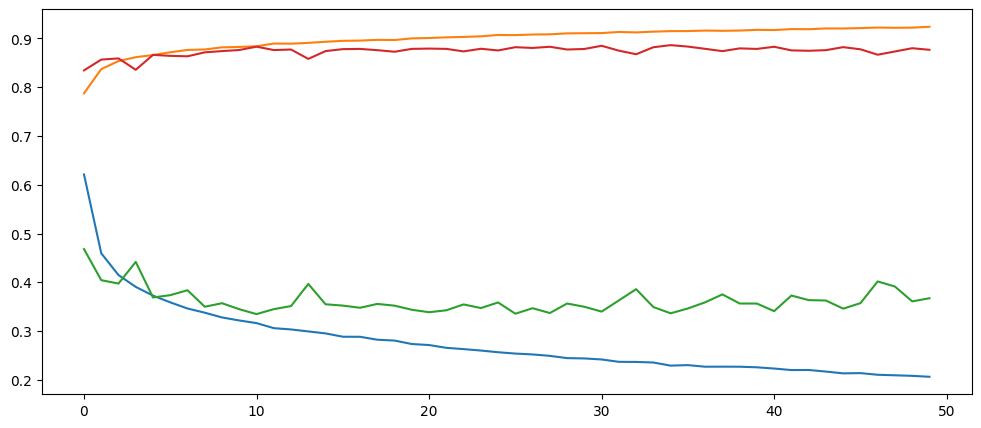

In [ ]:
##plot
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(history_BNorm.history["loss"] , label="train loss")
ax.plot(history_BNorm.history["accuracy"], label="train accuracy")
ax.plot(history_BNorm.history["val_loss"], label="validation loss")
ax.plot(history_BNorm.history["val_accuracy"], label="validation accuracy")

## Batch normalization before activation function

In [ ]:
## model with Lecunn initialization
initializer_lecun = keras.initializers.LecunNormal()

model_BNorm_before = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(50, kernel_initializer= initializer_lecun),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("selu"),
    keras.layers.Dense(50),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("selu"),
    keras.layers.Dense(10, activation="softmax")
]

)

In [ ]:
## compile model
model_BNorm_before.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
## fit model
history_BNorm_before = model_BNorm_before.fit(X_train, y_train, epochs=50, validation_split=0.15)

Epoch 1/50
1594/1594 [==============================] - 6s 3ms/step - loss: 0.5784 - accuracy: 0.8044 - val_loss: 0.4454 - val_accuracy: 0.8402
Epoch 2/50
1594/1594 [==============================] - 5s 3ms/step - loss: 0.4568 - accuracy: 0.8420 - val_loss: 0.4185 - val_accuracy: 0.8496
Epoch 3/50
1594/1594 [==============================] - 4s 3ms/step - loss: 0.4264 - accuracy: 0.8515 - val_loss: 0.4018 - val_accuracy: 0.8594
Epoch 4/50
1594/1594 [==============================] - 5s 3ms/step - loss: 0.4089 - accuracy: 0.8545 - val_loss: 0.3883 - val_accuracy: 0.8581
Epoch 5/50
1594/1594 [==============================] - 4s 3ms/step - loss: 0.3915 - accuracy: 0.8617 - val_loss: 0.3869 - val_accuracy: 0.8622
Epoch 6/50
1594/1594 [==============================] - 4s 3ms/step - loss: 0.3824 - accuracy: 0.8641 - val_loss: 0.3785 - val_accuracy: 0.8620
Epoch 7/50
1594/1594 [==============================] - 5s 3ms/step - loss: 0.3698 - accuracy: 0.8677 - val_loss: 0.3719 - val_accuracy:

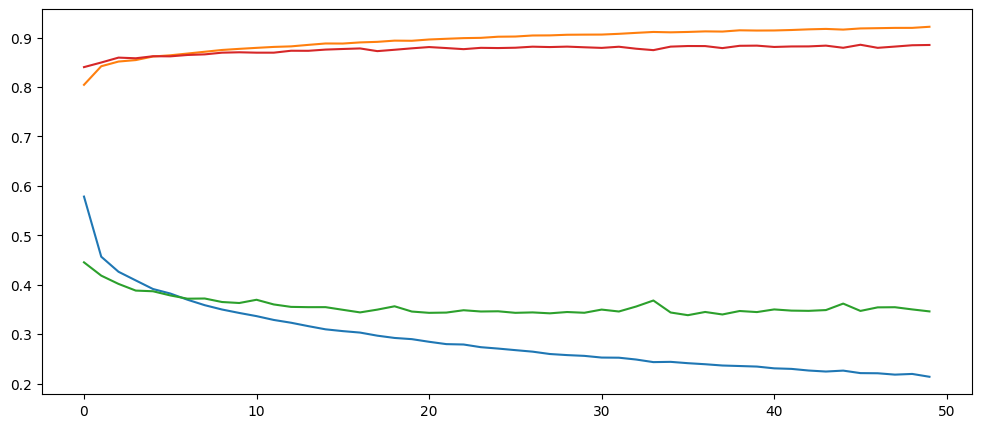

In [ ]:
##plot
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(history_BNorm_before.history["loss"] , label="train loss")
ax.plot(history_BNorm_before.history["accuracy"], label="train accuracy")
ax.plot(history_BNorm_before.history["val_loss"], label="validation loss")
ax.plot(history_BNorm_before.history["val_accuracy"], label="validation accuracy")

## Limited data problem

Transfer learning

In [ ]:
model_lecun_init.save("model_for_transfer.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
transfered_model = keras.models.load_model("model_for_transfer.h5")

In [ ]:
new_model = keras.models.Sequential(transfered_model.layers[:-1])
new_model.add(keras.layers.Dense(1,activation="sigmoid"))
new_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 50)                39250     
                                                                 
 dense_4 (Dense)             (None, 50)                2550      
                                                                 
 dense_12 (Dense)            (None, 1)                 51        
                                                                 
Total params: 41851 (163.48 KB)
Trainable params: 41851 (163.48 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


##clone model

In [ ]:
model_cloned = keras.models.clone_model(model_BNorm_before)
model_cloned.set_weights(model_BNorm_before.get_weights())

In [ ]:
model_cloned.get_weights()[2]

array([1.40718157e-05, 2.80749518e-05, 7.99122645e-05, 3.11819516e-04,
       7.21364049e-04, 1.26450718e-03, 2.71426630e-03, 8.58123228e-03,
       2.16315854e-02, 5.46520017e-02, 1.21288776e-01, 1.71486080e-01,
       1.97270945e-01, 1.91406608e-01, 1.91601411e-01, 2.04561040e-01,
       1.91705287e-01, 1.47457659e-01, 9.80920717e-02, 4.06508707e-02,
       1.53269880e-02, 8.19090288e-03, 5.25587378e-03, 3.53743555e-03,
       1.92906964e-03, 1.10100082e-03, 5.42180613e-04, 4.66858946e-05,
       6.84265324e-05, 2.56312924e-04, 3.68866749e-04, 1.52391184e-03,
       2.63515278e-03, 6.82364078e-03, 2.66927294e-02, 6.53759167e-02,
       1.20471366e-01, 1.99731499e-01, 3.01901221e-01, 3.78255546e-01,
       4.27851498e-01, 4.21786308e-01, 4.11521852e-01, 4.33340251e-01,
       4.17929858e-01, 3.44765425e-01, 2.72778749e-01, 1.68784022e-01,
       9.80306566e-02, 5.18344194e-02, 2.35200282e-02, 1.35938330e-02,
       8.66300520e-03, 4.60999273e-03, 2.14295485e-03, 2.08978992e-04,
      

In [ ]:
model_BNorm_before.get_weights()[2]

array([1.40718157e-05, 2.80749518e-05, 7.99122645e-05, 3.11819516e-04,
       7.21364049e-04, 1.26450718e-03, 2.71426630e-03, 8.58123228e-03,
       2.16315854e-02, 5.46520017e-02, 1.21288776e-01, 1.71486080e-01,
       1.97270945e-01, 1.91406608e-01, 1.91601411e-01, 2.04561040e-01,
       1.91705287e-01, 1.47457659e-01, 9.80920717e-02, 4.06508707e-02,
       1.53269880e-02, 8.19090288e-03, 5.25587378e-03, 3.53743555e-03,
       1.92906964e-03, 1.10100082e-03, 5.42180613e-04, 4.66858946e-05,
       6.84265324e-05, 2.56312924e-04, 3.68866749e-04, 1.52391184e-03,
       2.63515278e-03, 6.82364078e-03, 2.66927294e-02, 6.53759167e-02,
       1.20471366e-01, 1.99731499e-01, 3.01901221e-01, 3.78255546e-01,
       4.27851498e-01, 4.21786308e-01, 4.11521852e-01, 4.33340251e-01,
       4.17929858e-01, 3.44765425e-01, 2.72778749e-01, 1.68784022e-01,
       9.80306566e-02, 5.18344194e-02, 2.35200282e-02, 1.35938330e-02,
       8.66300520e-03, 4.60999273e-03, 2.14295485e-03, 2.08978992e-04,
      

In [ ]:
x_train_new = X_train[:5000, : , :]

In [ ]:
## just find where y=9
y_train_new = np.where(y_train==9 , 1, 0)[:5000]

In [ ]:
new_model_1 = keras.models.Sequential(model_cloned.layers[:-1])
new_model_1.add(keras.layers.Dense(1,activation="sigmoid"))
new_model_1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 batch_normalization_2 (Bat  (None, 784)               3136      
 chNormalization)                                                
                                                                 
 dense_9 (Dense)             (None, 50)                39250     
                                                                 
 batch_normalization_3 (Bat  (None, 50)                200       
 chNormalization)                                                
                                                                 
 activation (Activation)     (None, 50)                0         
                                                                 
 dense_10 (Dense)            (None, 50)               

In [ ]:
new_model_1.compile(loss="binary_crossentropy",
                    optimizer="sgd",
                    metrics=["accuracy"])

In [ ]:
new_model_1.fit(x_train_new, y_train_new, epochs = 15, validation_split=0.15)

Epoch 1/15
133/133 [==============================] - 2s 5ms/step - loss: 0.3953 - accuracy: 0.8499 - val_loss: 0.1993 - val_accuracy: 0.9547
Epoch 2/15
133/133 [==============================] - 0s 3ms/step - loss: 0.1743 - accuracy: 0.9607 - val_loss: 0.1186 - val_accuracy: 0.9773
Epoch 3/15
133/133 [==============================] - 0s 3ms/step - loss: 0.1133 - accuracy: 0.9774 - val_loss: 0.0855 - val_accuracy: 0.9853
Epoch 4/15
133/133 [==============================] - 0s 3ms/step - loss: 0.0885 - accuracy: 0.9816 - val_loss: 0.0665 - val_accuracy: 0.9880
Epoch 5/15
133/133 [==============================] - 0s 3ms/step - loss: 0.0759 - accuracy: 0.9828 - val_loss: 0.0556 - val_accuracy: 0.9880
Epoch 6/15
133/133 [==============================] - 0s 3ms/step - loss: 0.0589 - accuracy: 0.9866 - val_loss: 0.0461 - val_accuracy: 0.9880
Epoch 7/15
133/133 [==============================] - 0s 3ms/step - loss: 0.0549 - accuracy: 0.9887 - val_loss: 0.0425 - val_accuracy: 0.9880
Epoch 

In [ ]:
new_model_1.get_weights()[-1]

array([-0.91616434], dtype=float32)